<a href="https://colab.research.google.com/github/Suryaprasadindra/research/blob/main/v_1_0_bigmartsales_with_k_means_%26_simple_random_splitting_with_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **preprocessing steps**

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('Train.csv')

# Store the target variable
target_variable = data['Item_Outlet_Sales']

# Add a new feature 'Outlet_Age'
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

# Define numeric and categorical features
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Create the full pipeline for both numeric and categorical data processing
full_pipeline = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())]), numeric_features),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown='ignore', drop='first'))]), categorical_features)
])

# Apply the full pipeline to the data
processed_data = full_pipeline.fit_transform(data)

# OneHotEncoder feature names
ohe_features = full_pipeline.named_transformers_['cat']['onehot'].get_feature_names_out()
new_column_names = numeric_features + list(ohe_features)  # Concatenate all feature names

# Convert to DataFrame
processed_df = pd.DataFrame(processed_data.toarray(), columns=new_column_names)

# Attach the target variable back to the processed DataFrame
processed_df['Item_Outlet_Sales'] = target_variable

# Save or display the processed DataFrame
print(processed_df.head())


   Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  x0_Low Fat  x0_Regular  \
0    -0.841872        -0.970732  1.747454   -0.139541         1.0         0.0   
1    -1.641706        -0.908111 -1.489023   -1.334103         0.0         1.0   
2     1.098554        -0.956917  0.010040   -0.139541         1.0         0.0   
3     1.500838        -1.281758  0.660050   -0.020085         0.0         1.0   
4    -0.929428        -1.281758 -1.399220    1.293934         1.0         0.0   

   x0_low fat  x0_reg  x1_Breads  x1_Breakfast  ...  x2_OUT046  x2_OUT049  \
0         0.0     0.0        0.0           0.0  ...        0.0        1.0   
1         0.0     0.0        0.0           0.0  ...        0.0        0.0   
2         0.0     0.0        0.0           0.0  ...        0.0        1.0   
3         0.0     0.0        0.0           0.0  ...        0.0        0.0   
4         0.0     0.0        0.0           0.0  ...        0.0        0.0   

   x3_Medium  x3_Small  x4_Tier 2  x4_Tier 3  x5_S

In [21]:
# Calculate correlation matrix
correlation_matrix = processed_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                           Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  \
Item_Weight               1.000000e+00        -0.012049  0.024756    0.008301   
Item_Visibility          -1.204853e-02         1.000000 -0.001315    0.074834   
Item_MRP                  2.475610e-02        -0.001315  1.000000   -0.005020   
Outlet_Age                8.300836e-03         0.074834 -0.005020    1.000000   
x0_Low Fat                2.280804e-02        -0.046386 -0.000466   -0.002218   
x0_Regular               -2.126293e-02         0.047631  0.008299    0.002051   
x0_low fat               -6.014094e-03        -0.001860 -0.011904    0.026852   
x0_reg                   -3.794890e-04         0.000523 -0.008865   -0.021281   
x1_Breads                -5.061184e-02         0.000416 -0.000112    0.003631   
x1_Breakfast             -1.958157e-03         0.043418  0.001460    0.006768   
x1_Canned                -3.114182e-02         0.011114 -0.005666   -0.010998   
x1_Dairy                  3.

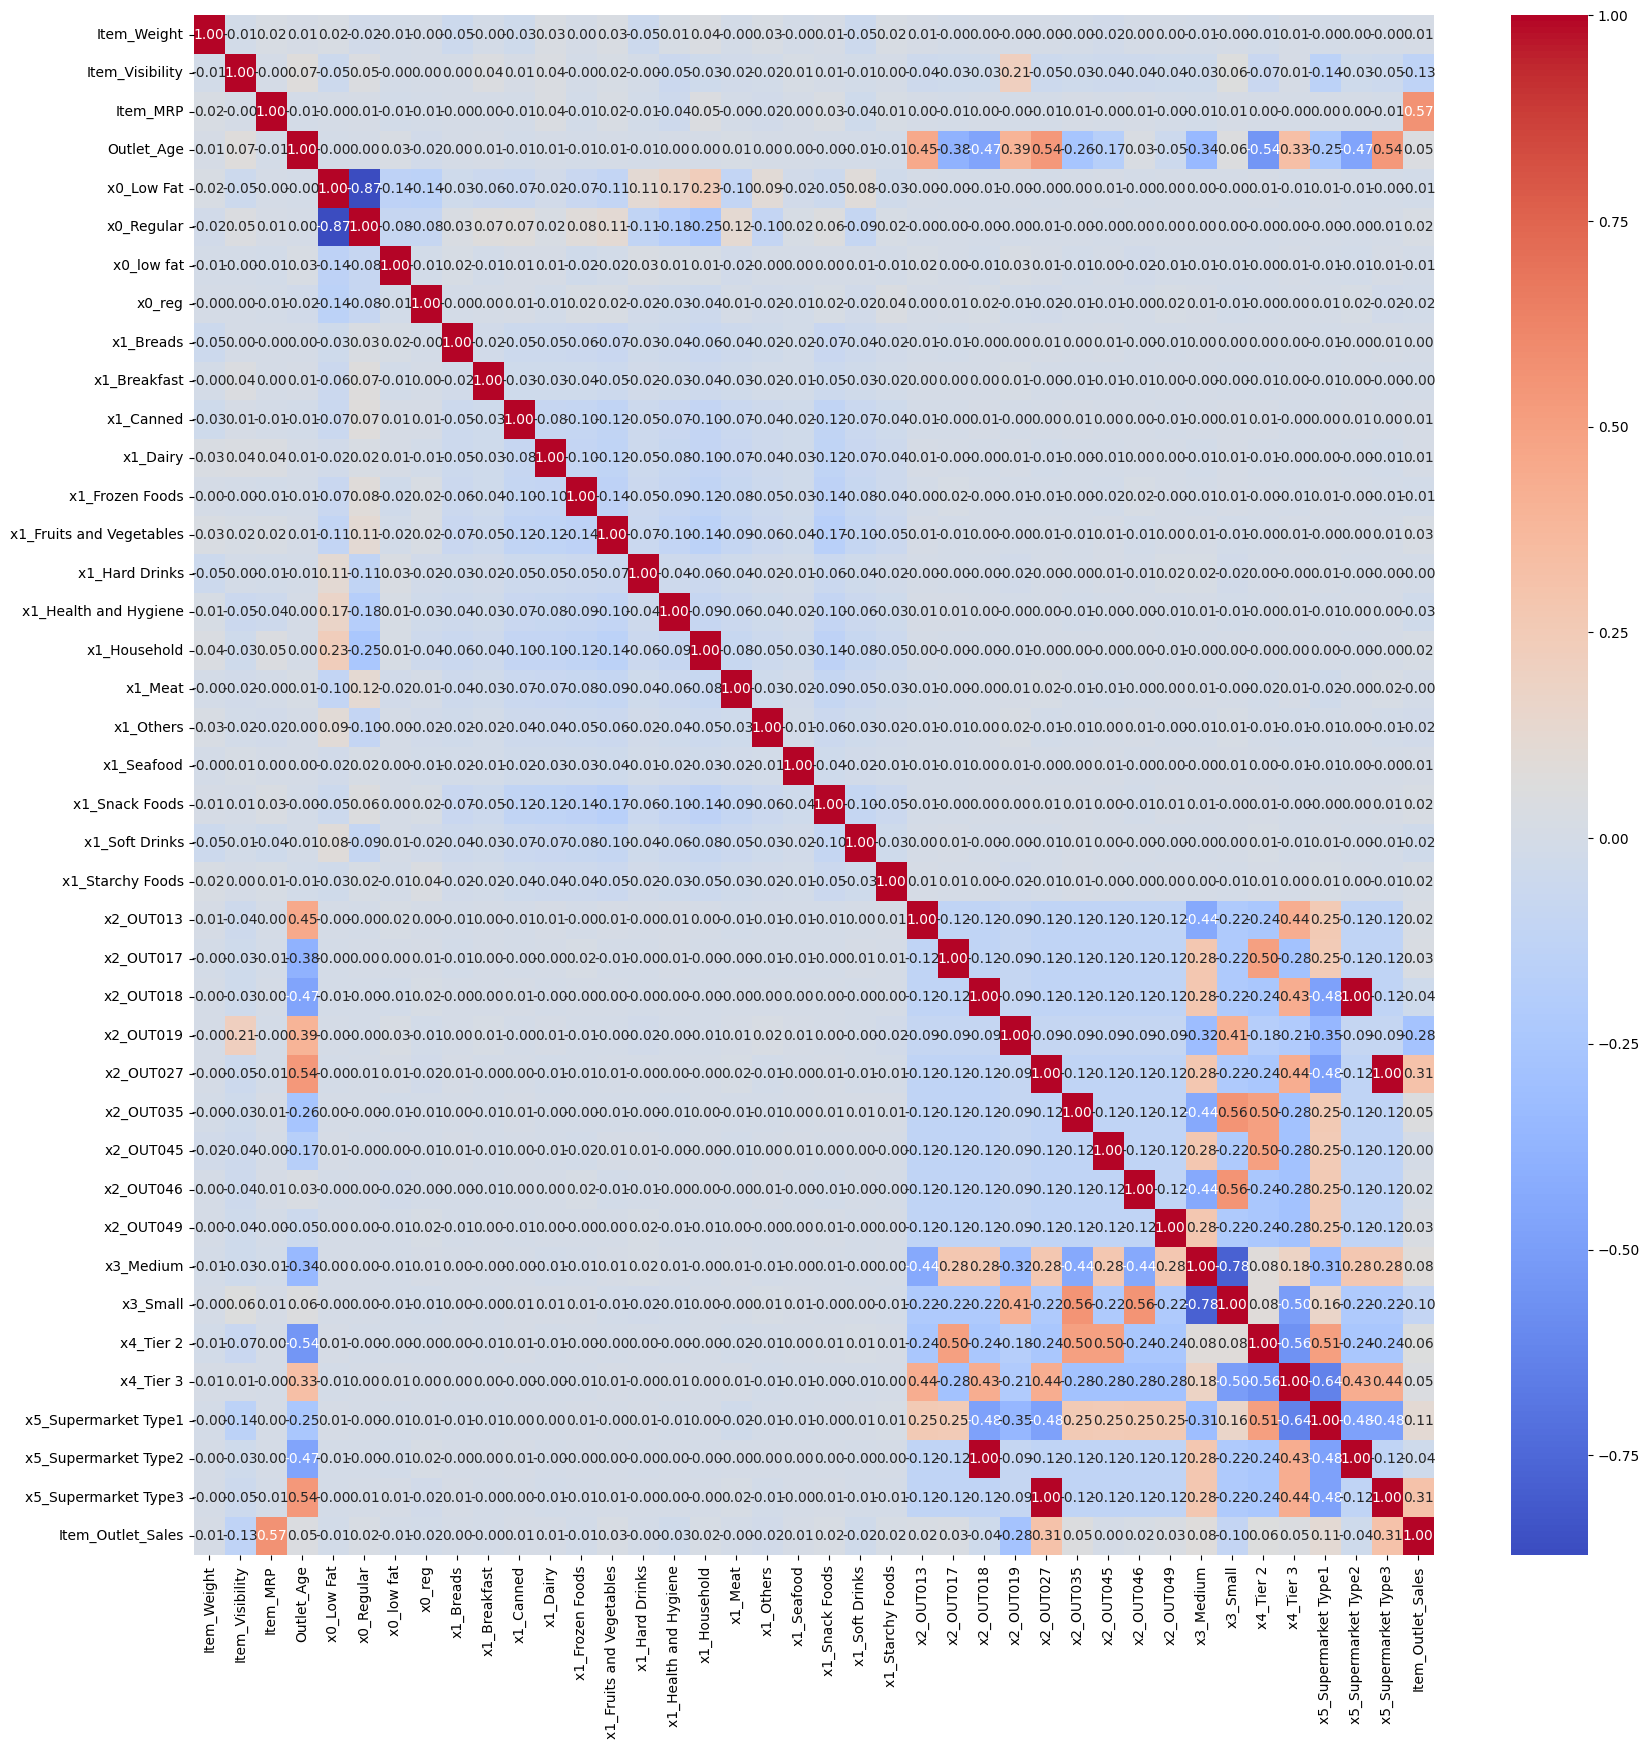

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show plot
plt.show()


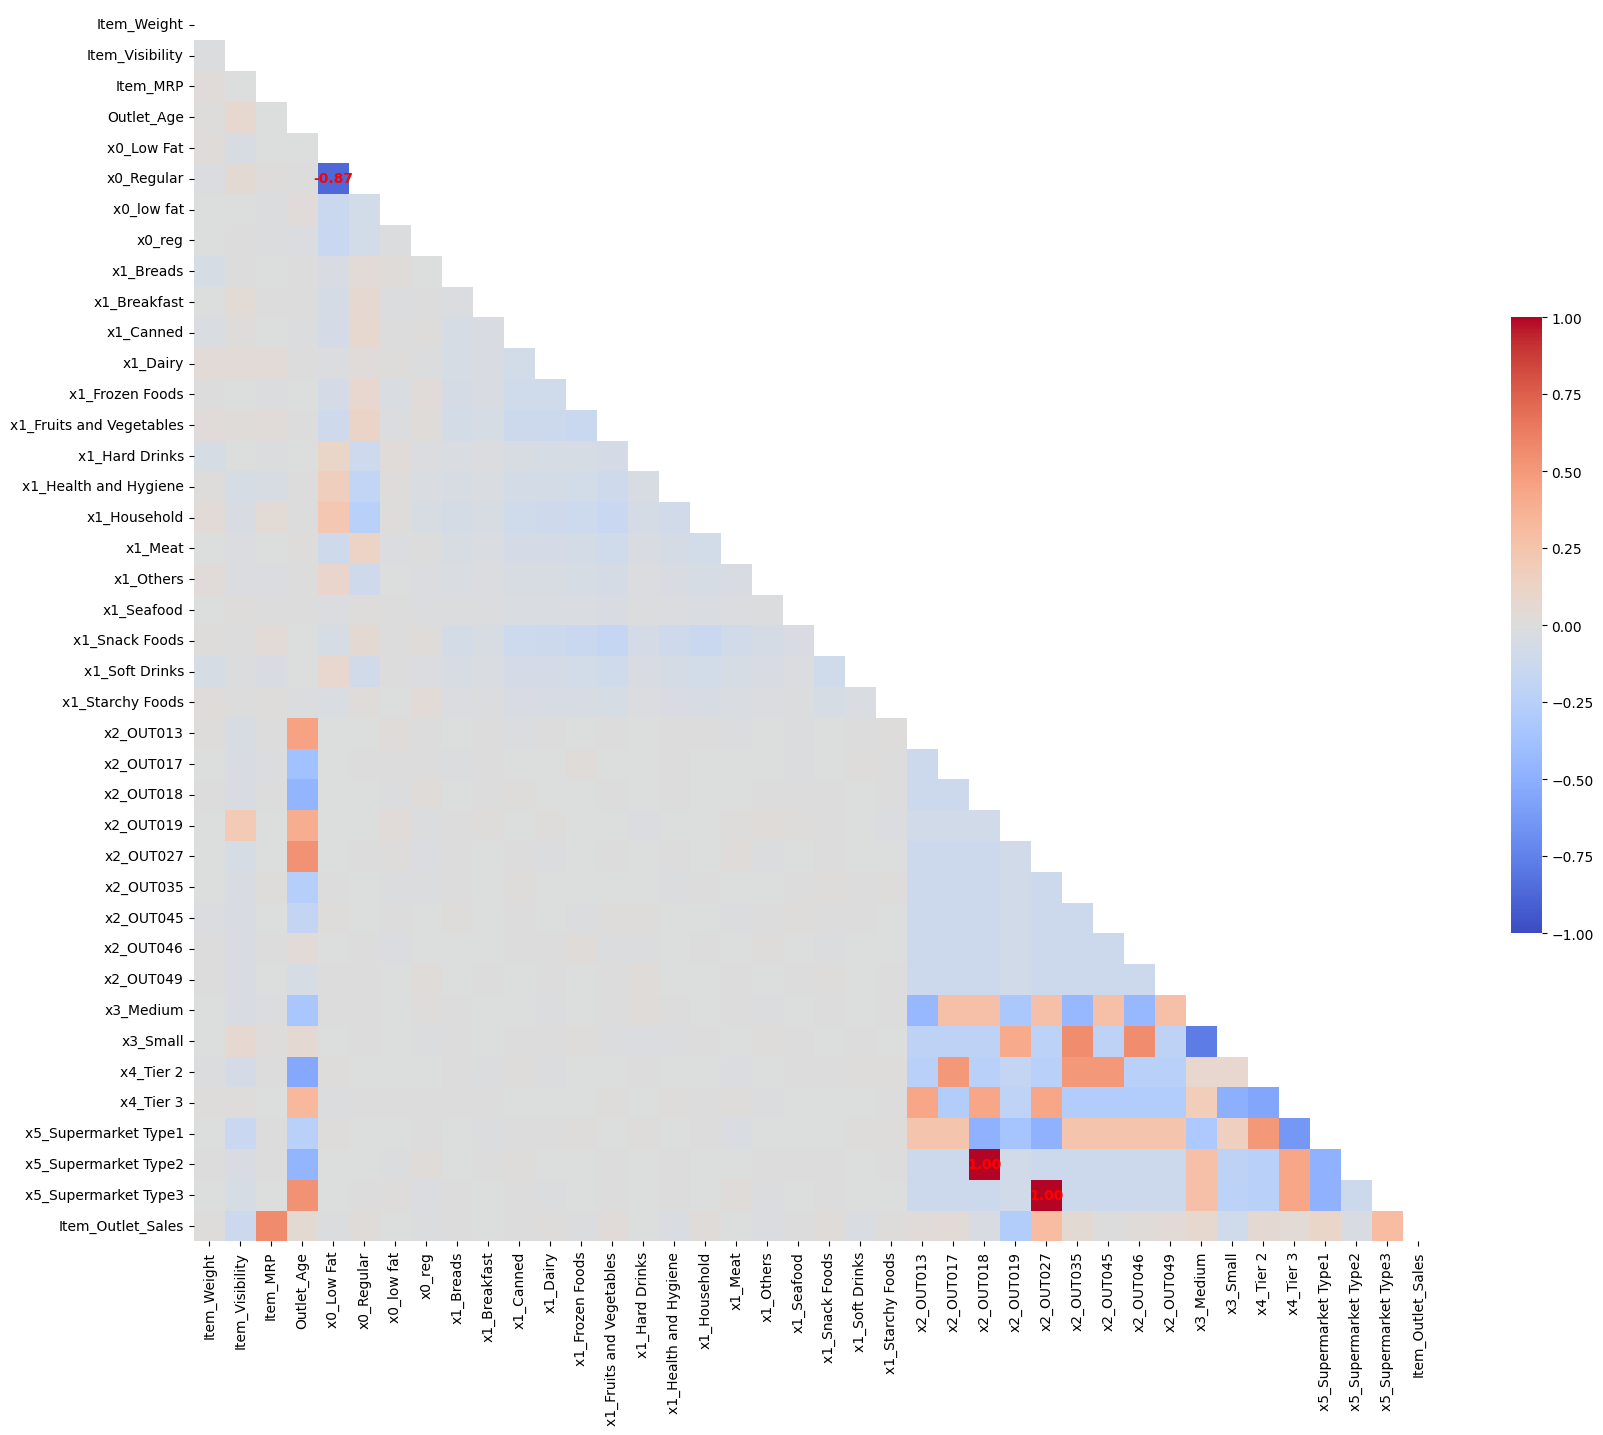

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = processed_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .5},
            annot_kws={"weight": 'bold'},
            vmin=-1, vmax=1)

# Custom annotation: only show annotations where absolute correlation is greater than 0.8
for text in plt.gca().texts:
    t = float(text.get_text())
    if abs(t) <= 0.8:
        text.set_text('')
    else:
        text.set_color('red')
        text.set_fontsize('medium')
        text.set_weight('bold')

# Show plot
plt.show()


In [24]:
data = processed_df

In [25]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,x0_Low Fat,x0_Regular,x0_low fat,x0_reg,x1_Breads,x1_Breakfast,...,x2_OUT046,x2_OUT049,x3_Medium,x3_Small,x4_Tier 2,x4_Tier 3,x5_Supermarket Type1,x5_Supermarket Type2,x5_Supermarket Type3,Item_Outlet_Sales
0,-0.841872,-0.970732,1.747454,-0.139541,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3735.1380
1,-1.641706,-0.908111,-1.489023,-1.334103,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,443.4228
2,1.098554,-0.956917,0.010040,-0.139541,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2097.2700
3,1.500838,-1.281758,0.660050,-0.020085,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,732.3800
4,-0.929428,-1.281758,-1.399220,1.293934,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,994.7052


# **k means splitting method**

In [65]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data_with_kmeans(data, k, target_var='Item_Outlet_Sales'):
    # Assuming all data is numeric and the target variable is part of the data frame
    X = data.drop(columns=[target_var])  # Exclude the target variable for clustering
    y = data[target_var]

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)  # Cluster based on the feature set

    # Assign cluster labels to the data
    data['Cluster'] = clusters

    # Initialize lists to collect train and test indices
    train_indices = []
    test_indices = []

    # Split data from each cluster
    for cluster in range(k):
        cluster_indices = data[data['Cluster'] == cluster].index
        train_idx, test_idx = train_test_split(cluster_indices, train_size=0.8, random_state=42)
        train_indices.extend(train_idx)
        test_indices.extend(test_idx)

    # Extract train and test sets
    X_train = data.loc[train_indices].drop(columns=[target_var, 'Cluster'])  # Remove target and cluster columns from features
    Y_train = data.loc[train_indices, target_var]
    X_test = data.loc[test_indices].drop(columns=[target_var, 'Cluster'])
    Y_test = data.loc[test_indices, target_var]

    # Clean up the data by removing the cluster column
    data.drop(columns=['Cluster'], inplace=True)

    return X_train, Y_train, X_test, Y_test



**selecing k clusters**

In [78]:
'''
# Example usage
data = pd.read_csv('your_data.csv')  # Make sure the path to your dataset is correct'''
k = 8 # Set the k value for K-Means
X_train, Y_train, X_test, Y_test = split_data_with_kmeans(data, k=k)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


accuracy,mse,rmse

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, Y_train, Y_test are already defined
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Predicting the outcomes for both the training set and the test set
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating MSE and RMSE for the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = mse_test ** 0.5

# Calculating MSE and RMSE for the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = mse_train ** 0.5

# Calculating R^2 score for training and testing sets
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training R^2 Score:", r2_train)
print("Testing MSE:", mse_test)
print("Testing RMSE:", rmse_test)
print("Testing R^2 Score:", r2_test)


Training MSE: 1265027.6914654444
Training RMSE: 1124.7344982107752
Training R^2 Score: 0.5643886294332303
Testing MSE: 1295067.8223290786
Testing RMSE: 1138.0104667045373
Testing R^2 Score: 0.5598351172837788


#**normal method**

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load preprocessed data
# Ensure that 'processed_df' includes the target variable 'Item_Outlet_Sales' and all features

# Splitting features and target
X = processed_df.drop('Item_Outlet_Sales', axis=1)
y = processed_df['Item_Outlet_Sales']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predicting the outcomes for both the training set and the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating MSE and RMSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5

# Calculating MSE and RMSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5

# Calculating R^2 score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training R^2 Score:", r2_train)
print("Testing MSE:", mse_test)
print("Testing RMSE:", rmse_test)
print("Testing R^2 Score:", r2_test)


Training MSE: 1298317.3806363435
Training RMSE: 1139.4373087784793
Training R^2 Score: 0.5609987896909088
Testing MSE: 1210441.9323131698
Testing RMSE: 1100.2008599856526
Testing R^2 Score: 0.5678526492514178


# **different k values at a time**

kmeans split function

In [86]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to split data using K-Means
def split_data_with_kmeans(data, k, target_var='Item_Outlet_Sales'):
    X = data.drop(columns=[target_var])  # Features for clustering
    y = data[target_var]                # Target variable

    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)  # Cluster based on the feature set

    data['Cluster'] = clusters

    train_indices = []
    test_indices = []

    for cluster in range(k):
        cluster_indices = data[data['Cluster'] == cluster].index
        train_idx, test_idx = train_test_split(cluster_indices, train_size=0.7, random_state=42)
        train_indices.extend(train_idx)
        test_indices.extend(test_idx)

    X_train = data.loc[train_indices].drop(columns=[target_var, 'Cluster'])
    Y_train = data.loc[train_indices, target_var]
    X_test = data.loc[test_indices].drop(columns=[target_var, 'Cluster'])
    Y_test = data.loc[test_indices, target_var]

    data.drop(columns=['Cluster'], inplace=True)

    return X_train, Y_train, X_test, Y_test


diffderent k values

In [87]:

# Define range of k values to test
k_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40]

# Initialize the Linear Regression model
model = LinearRegression()

# Loop through each k value and calculate metrics
results = []
for k in k_values:
    X_train, Y_train, X_test, Y_test = split_data_with_kmeans(data, k=k)

    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Predicting the outcomes
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Calculate metrics
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(Y_train, Y_train_pred)

    mse_test = mean_squared_error(Y_test, Y_test_pred)
    rmse_test = mse_test ** 0.5
    r2_test = r2_score(Y_test, Y_test_pred)

    results.append((k, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test))

# Print the results
for result in results:
    print(f"k = {result[0]}: Training MSE = {result[1]}, Training RMSE = {result[2]}, Training R^2 = {result[3]}, "
          f"Testing MSE = {result[4]}, Testing RMSE = {result[5]}, Testing R^2 = {result[6]}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k = 2: Training MSE = 1273131.5717191573, Training RMSE = 1128.3313217841458, Training R^2 = 0.5654512558001027, Testing MSE = 1269346.7145644582, Testing RMSE = 1126.652881132631, Testing R^2 = 0.5576799472353242
k = 3: Training MSE = 1243815.3203699372, Training RMSE = 1115.264686238176, Training R^2 = 0.5633513831194177, Testing MSE = 1335923.4618851834, Testing RMSE = 1155.8215527862349, Testing R^2 = 0.5628926586870502
k = 4: Training MSE = 1256310.8330602036, Training RMSE = 1120.8527258566148, Training R^2 = 0.5723005679781992, Testing MSE = 1308296.5496835373, Testing RMSE = 1143.8079164280764, Testing R^2 = 0.541226201394442
k = 5: Training MSE = 1289823.4070321852, Training RMSE = 1135.703925780036, Training R^2 = 0.5612146118144474, Testing MSE = 1229828.9397675493, Testing RMSE = 1108.976528050774, Testing R^2 = 0.567852649002565
k = 6: Training MSE = 1275625.5065344444, Training RMSE = 1129.4359240498968, Training R^2 = 0.5675750083214277, Testing MSE = 1264081.8886321525,

**normal method**
Training MSE: 1302777.5099731677
Training RMSE: 1141.3927939027685
**Training R^2 Score: 0.5595823579451878**
Testing MSE: 1143892.885932357
Testing RMSE: 1069.5292824099567
**Testing R^2 Score: 0.5791370552670385**